In [ ]:
# Mouting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Daatset locations on G drive
trainPath='/content/drive/MyDrive/SEMProject/SEM100/train'
testPath='/content/drive/MyDrive/SEMProject/SEM100/test'

In [ ]:
labels = ['Biological', 'Fibres', 'Films_Coated_Surface', 'MEMS_devices_and_electrodes', 'Nanowires', 'Particles', 'Patterned_surface', 'Porous_Sponge', 'Powder', 'Tips']

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1223 files belonging to 10 classes.
Using 979 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1223 files belonging to 10 classes.
Using 244 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['Biological', 'Fibres', 'Films_Coated_Surface', 'MEMS_devices_and_electrodes', 'Nanowires', 'Particles', 'Patterned_surface', 'Porous_Sponge', 'Powder', 'Tips']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Dropout(0.1),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.05),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 45, 45, 32)        0

In [ ]:
epochs=75
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1,
)

Epoch 1/75
31/31 [==============================] - 210s 4s/step - loss: 2.2947 - accuracy: 0.1553 - val_loss: 2.2880 - val_accuracy: 0.1475
Epoch 2/75
31/31 [==============================] - 72s 2s/step - loss: 2.2825 - accuracy: 0.1481 - val_loss: 2.2837 - val_accuracy: 0.1475
Epoch 3/75
31/31 [==============================] - 70s 2s/step - loss: 2.2798 - accuracy: 0.1563 - val_loss: 2.2731 - val_accuracy: 0.1475
Epoch 4/75
31/31 [==============================] - 73s 2s/step - loss: 2.2212 - accuracy: 0.1583 - val_loss: 2.2357 - val_accuracy: 0.1762
Epoch 5/75
31/31 [==============================] - 75s 2s/step - loss: 2.1567 - accuracy: 0.2033 - val_loss: 2.1738 - val_accuracy: 0.2090
Epoch 6/75
31/31 [==============================] - 69s 2s/step - loss: 2.1299 - accuracy: 0.1971 - val_loss: 2.1273 - val_accuracy: 0.1885
Epoch 7/75
31/31 [==============================] - 72s 2s/step - loss: 2.0888 - accuracy: 0.2237 - val_loss: 2.1493 - val_accuracy: 0.1721
Epoch 8/75
31/31 [=

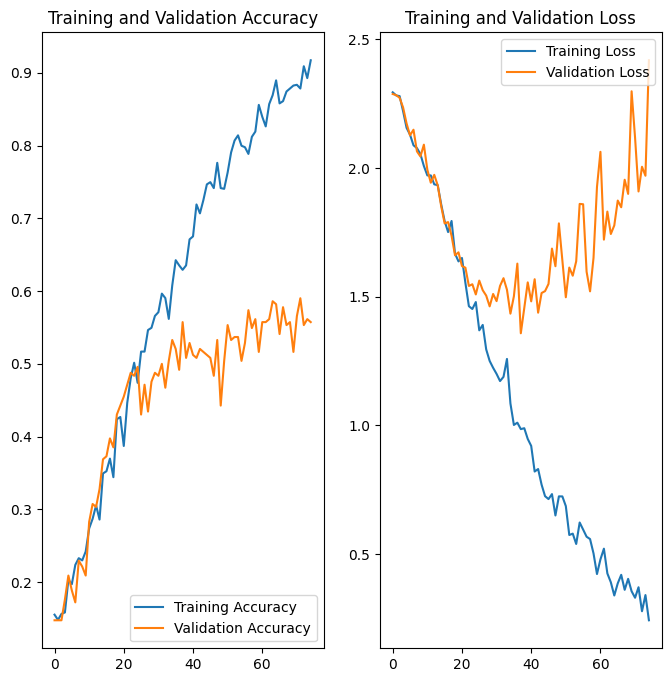

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Model evaluation
scores_train = model.evaluate(train_ds,verbose=1)
scores_validation = model.evaluate(val_ds,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))#For plotting Accuracy and Lossdef LearningCurve(history):

print(history.history.keys())

8/8 [==============================] - 6s 780ms/step - loss: 2.4192 - accuracy: 0.5574
Train Accuracy: 96.22%
Validation Accuracy: 55.74%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


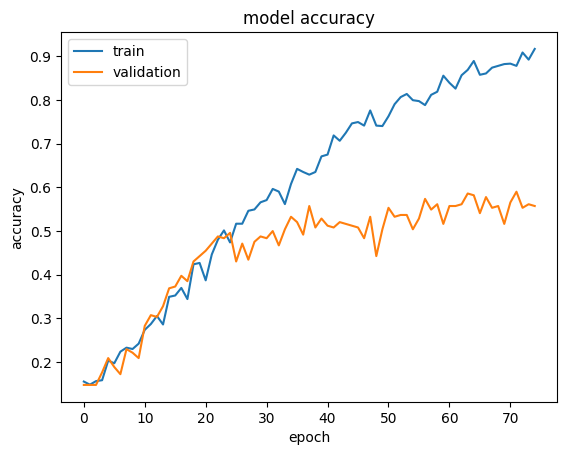

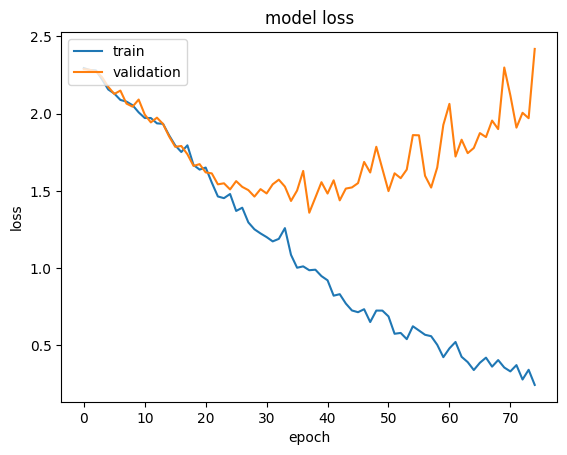

In [ ]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()

In [ ]:
filePath = "/content/drive/MyDrive/SEMProject/SEM100/test/Biological/L7_0349b4595e70ecd793fe0c7785fead38.jpg"

img = tf.keras.utils.load_img(
    filePath, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 280ms/step
This image most likely belongs to Patterned_surface with a 51.25 percent confidence.


In [ ]:
print(predictions)
print(score)

[[ 3.246093   2.4521797 -2.8548067 -2.3126915 -2.5110865 -3.7585592
   3.8601775 -2.8679352  2.0203445 -5.3926616]]
tf.Tensor(
[2.7730599e-01 1.2536232e-01 6.2140147e-04 1.0685871e-03 8.7629020e-04
 2.5169662e-04 5.1245147e-01 6.1329658e-04 8.1399813e-02 4.9112921e-05], shape=(10,), dtype=float32)


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  testPath,
  labels='inferred',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 319 files belonging to 10 classes.


In [ ]:
predicted_classes = np.array([])
test_labels = np.array([])

for x, y in test_ds:
  predicted_classes = np.concatenate([predicted_classes, np.argmax(model(x), axis=-1)])
  test_labels = np.concatenate([test_labels, y.numpy()])

In [ ]:
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()

[[10  7  1  1  5  0  6  1  8  1]
 [ 3 26  0  0  2  0  1  0  2  0]
 [ 0  0 10  1  1  0  3  3  4  0]
 [ 9  7  0  7  2  0  3  1  1  4]
 [ 1  2  1  1 13  0  1  2  2  2]
 [ 2  2  0  0  1  2  5  0  0  0]
 [ 3  4  4  3  1  3 33  3  5  0]
 [ 3  2  0  1  0  1  2 38  3  0]
 [ 1  2  4  2  1  0  2  1 10  0]
 [ 5  1  0  2  0  0  0  0  2 10]]
              precision    recall  f1-score   support

         0.0       0.27      0.25      0.26        40
         1.0       0.49      0.76      0.60        34
         2.0       0.50      0.45      0.48        22
         3.0       0.39      0.21      0.27        34
         4.0       0.50      0.52      0.51        25
         5.0       0.33      0.17      0.22        12
         6.0       0.59      0.56      0.57        59
         7.0       0.78      0.76      0.77        50
         8.0       0.27      0.43      0.33        23
         9.0       0.59      0.50      0.54        20

    accuracy                           0.50       319
   macro avg       

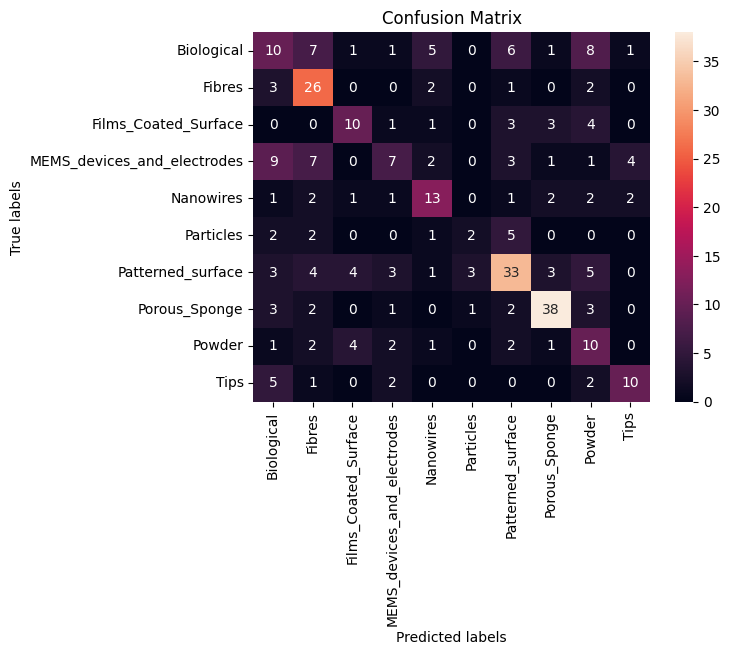

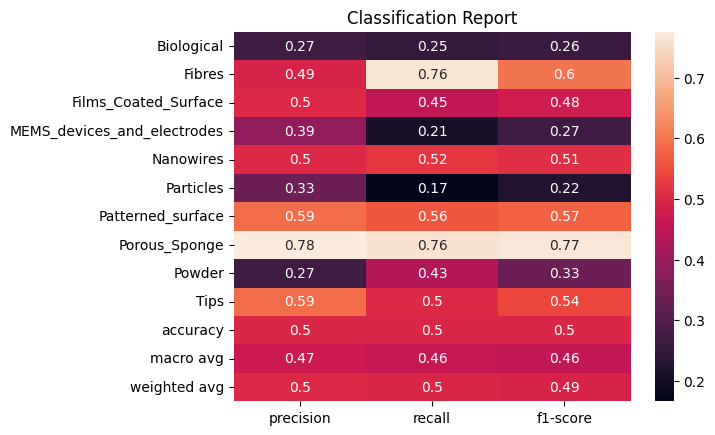

In [ ]:
cm = tf.math.confusion_matrix(labels= test_labels, predictions=predicted_classes).numpy()
cr=classification_report(test_labels, predicted_classes)
class_report=classification_report(test_labels, predicted_classes,
                                   target_names=test_ds.class_names,
                                   output_dict=True)
print(cm)
print(cr)

PerformanceReports(cm,class_report, test_ds.class_names)

In [ ]:
training_predicted_classes = np.array([])
train_labels = np.array([])

for x, y in train_ds:
  training_predicted_classes = np.concatenate([training_predicted_classes, np.argmax(model(x), axis=-1)])
  train_labels = np.concatenate([train_labels, y.numpy()])

[[ 78   0   0   0   0   0   0   0   3   0]
 [  0 128   0   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   3   2   0]
 [  0   0   0  78   0   0   0   0   0   0]
 [  0   0   1   0  94   0   0   1   2   1]
 [  0   0   2   0   4  65   0   0   0   0]
 [  0   0   4   0   0   0 149   0   0   0]
 [  0   0   0   0   0   0   0 105   1   0]
 [  0   4   5   0   0   0   1   0  78   0]
 [  2   0   0   0   0   0   0   0   1  81]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        81
         1.0       0.97      1.00      0.98       128
         2.0       0.88      0.95      0.91        91
         3.0       1.00      1.00      1.00        78
         4.0       0.96      0.95      0.95        99
         5.0       1.00      0.92      0.96        71
         6.0       0.99      0.97      0.98       153
         7.0       0.96      0.99      0.98       106
         8.0       0.90      0.89      0.89        88
         9.0       0.99     

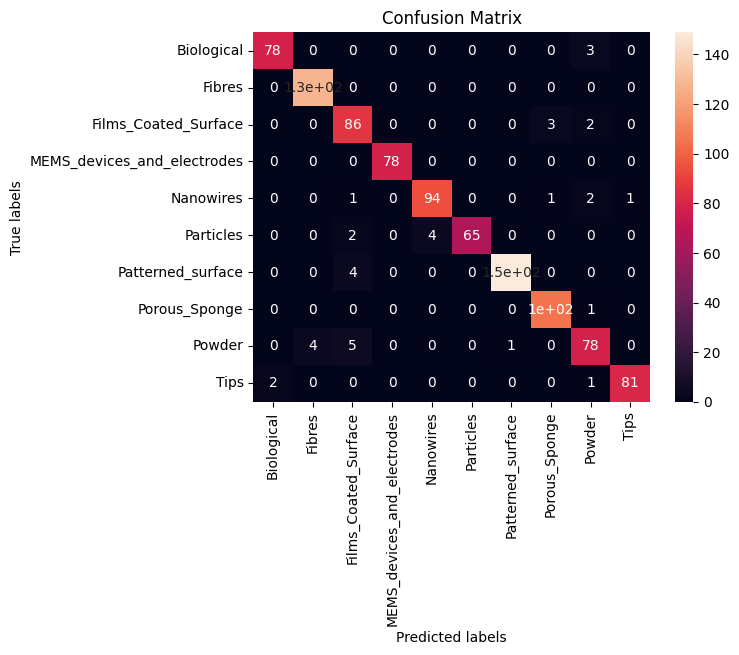

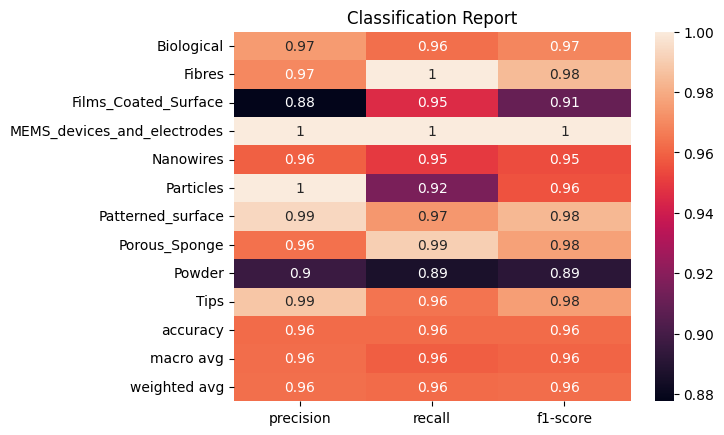

In [ ]:
cm = tf.math.confusion_matrix(labels= train_labels, predictions=training_predicted_classes).numpy()
cr=classification_report(train_labels, training_predicted_classes)
class_report=classification_report(train_labels, training_predicted_classes,
                                   target_names=class_names,
                                   output_dict=True)
print(cm)
print(cr)

PerformanceReports(cm,class_report, class_names)

In [ ]:
model_weight_file='/content/drive/MyDrive/SEMProject/SEM100/models/finalModels/customBaselineOverfit.h5'
model.save(model_weight_file)